**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024; Prof. V. F. de Almeida

# Introduction to the FIRES Project

**Student(s):**  Kyle Mills and Billy Manco and Donaita Anglade <br>
**Course:** Engy-4390: Nuclear Systems Design and Analysis  <br>
**Mentor and Collaborator:** Subash Sharma

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**17 Oct 24**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Domain](#domain)
* [Problem Statement](#problem)
* [Temperature](#temp)

## [Introduction](#toc)<a id="intro"></a>

This report will be about an investigation into the testing of a more viable material option for constructing high-temperature firebrick resistance-heated enerfy storage (FIRES). We are planning reviewing three different materials. Chromium Dioxide, Nickle Oxide and finally Magnisium Oxide. These materials will then be compared with Aluminium Oxide as well as go through similar tests. Air is the primary carrier for removal of heat in the system but other carriers can also be investigated. 

FIRES bricks is a heated thermal energy storage device. The system works by having a large mass of heat-resistant bricks and an electrical heating system. Then a blower that uses air to remove heat through convection. This hot air is then used in applications where heat is required. 

## [Problem Statement](#toc)<a id="problem"></a>

The primary problem that is being investigated for this project is a Poisson problem. The origin of which comes from looking at how heat is transfered through a fluid flowing through holes in a FIRES brick. The model of the Poisson problem is as followed: 

\begin{align*}
 -\bigl(-k(x)\, u'\bigr)'(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
 q_n(a) &= h\,\bigl(u(a)-u_\text{ref}\bigr)., \\
 q_n(b) &= h\,\bigl(u(b)-u_\text{ref}\bigr).
\end{align*}

Where: <br>
u(x) is the temperature distribution.<br>
k(x) is the thermal conductivity <br>
f(x) is a heat source term.

What exactly does this problem state? There is a thermal conductivity term in the x direction multiplied by the temperature. This is added to the heat generation source term, happening at steady state. The x direction is between points a and b. The boundary conditions for points a and b are the thermal normal flux at its respected points. The thermal normal flux (q_n) is equal to the heat transfer coefficent (h) multiplied by the temperature difference. In the equation u(a) is the temeprature at point a subratcted from the refrence temperature. 


## [Domain](#toc)<a id="domain"></a>

The figure below is a visulization of the domain for this project. The left side diagram shows two bricks together (the red rectangles). With the inner yellow rectangles showing the tubes through the bricks. The right side diagram is an edge of the left side tube (yellow) then the area between the two tubes with the right side tube on the opposite end. 

Points a and b are on the edges of the red area between the two yellow tubes as seen in the right figure below. The normal vector from the thermal normal flux juts out from each point into the yellow section of the diagram. The brick itself is a lot hotter then the air flowing through the tubes so heat travels in a positive direction outwards. 

C:\Users\kw\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\kw\anaconda3\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


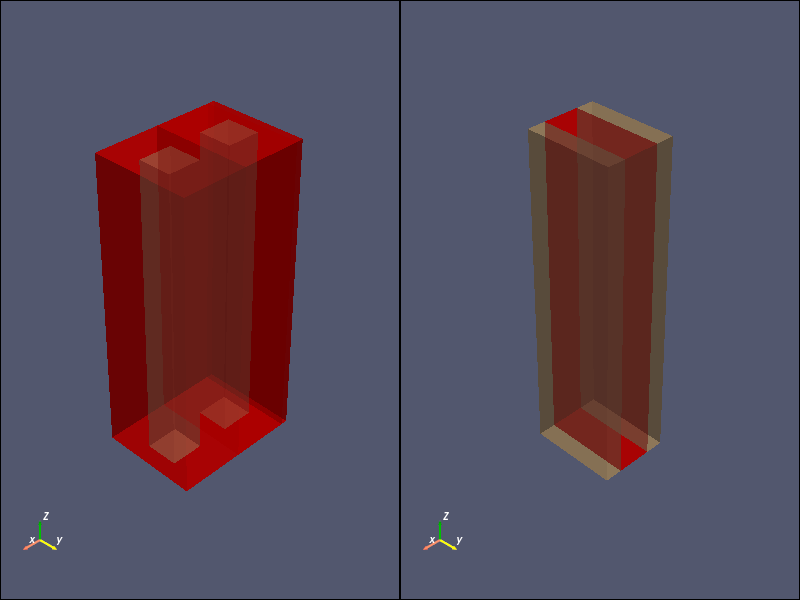

In [10]:
'''Domain'''
import pyvista as pv
def show_domain(screenshot=False):
   
    pv.set_plot_theme('paraview')

    
    #coolant = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_i)
    brick1=pv.Box(bounds=(0.0, 4, 0.0, 6, 0.0, 18.0), level=2, quads=True,)
    air1=pv.Box(bounds=(1, 3, 2, 4, 0.0, 18.0), level=2, quads=True,)
    #air2=pv.Box(bounds=(1, 1.5, 0, 5, 0.0, 18.0), level=0, quads=True,)
    brick2=pv.Box(bounds=(0.4, 8, 0.0, 6, 0.0, 18.0), level=2, quads=True,)
    air2=pv.Box(bounds=(5, 7, 2, 4, 0.0, 18.0), level=2, quads=True,)
    #fir 3D cross-section
    air3=pv.Box(bounds=(0, -1, 0, 5, 0.0, 18.0), level=0, quads=True,)
    brick3=pv.Box(bounds=(0.0, 2, 0.0, 5, 0.0, 18.0), level=2, quads=True,)
    air4=pv.Box(bounds=(2, 3, 0, 5, 0.0, 18.0), level=0, quads=True,)
    plo = pv.Plotter(notebook=True, shape=(1,2))
    plo = pv.Plotter(shape=(1,2)) 
    
    plo.subplot(0,0)
    
    plo.add_mesh(brick1, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air1, color='tan', opacity=.99)
    plo.add_mesh(brick2, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air2, color='tan', opacity=.99)
    plo.add_axes(xlabel='x', ylabel='y', zlabel='Z')

    plo.subplot(0,1)
    
    plo.add_mesh(brick3, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air3, color='tan', opacity=.99)
    #plo.add_mesh(brick2, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air4, color='tan', opacity=.99)
    plo.add_axes(xlabel='x', ylabel='y', zlabel='Z')
    
    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')
show_domain()

## [Developing Temperature](#toc)<a id="temp"></a>

The reference temperature (represented above by $u_\text{ref}$) would be the ambient temperature of air. For a problem with the same temperature at both ends, we would have a temperature of 20 degrees celsius cooling the wall of the bricks at both ends.

\begin{align*}
 T_{ref} &= 20\; [°C] \\
\end{align*}

We want, however, to introduce some level of asymmetry to the problem since the main reason why there coud be thermal runway in the system is due to the bricks heating up unevenly. While we've already said that the modeling of the thermal runway will not be done here on the project, we can still introduce a very preliminary form of this by using RobinBC, but with the reference temperatures being different at both ends of the domain. We choose to do this with a 20 degrees difference in the temperatures:

\begin{align*}
 T_{ref,a} &= 20\; [°C] \\
 T_{ref,b} &= 40\; [°C] \\
\end{align*}

The heat transfer coefficient will depend on the speed of the air being channeled through the bricks. However, even when the bricks are used to store energy instead of returning (that is, with the air being stagnant), the heat transfer coefficient will take on a positive value. Stack himself uses the following value for the coefficient with stagnant air in his *Applied Energy* paper:

\begin{align*}
 h &= 10\; \left [ \frac{W}{m^{2}K} \right ] \\
\end{align*}

What we have to define now are the functions for the thermal conductivity and the source. For the thermal conductivity, we used values found in Shackleford's *CRC Materials Science and Engineering Handbook*, plotted them in Excel and found a fitting polynomial function for the values of temperature. We obtained the following function:

\begin{align*}
 k(T) &= (2,49E-5)\cdot T^{2}-0,05875 \cdot T +40,85\; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

We might make the conductivity dependant on temperature in the future. As for now, we can't make it dependent on the temperature, so an aproximation of this will necessarilly be imperfect, since the value of the temperature is needed to know the value of the conductivity and that of the conductivity is needed for the temperature. We don't know the values of the temperature at the ends of the domain, even. A first approximation of the value of the conductivity will be of it as a linear function, with the values at the end being those that the thermal conductivity takes at the reference temperatures at the ends of the domain.

\begin{align*}
 k(T_{ref,a}) &= 25,777\; \left [ \frac{W}{mK} \right ]  \\
 k(T_{ref,b}) &= 24,903\; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

The function for the conductivity dependent on the position will be of this form:

\begin{align*}
 k(x) &= 25,777-17,469 \cdot x \; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

We were extremely close to implementing this function in our MOOSE code. Due to us running out of time, however, we were forced to instead use a constant value for the thermal conductivity:

\begin{align*}
 k &= 31 \; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

With regards to the heat source. The value of the generated heat will be given by Joule's Law. The formula is presented in the *Applied Energy* paper as follows:

\begin{align*}
F\left (x \right )=\dot{e}_{gen}=\frac{AV^{2}}{  L_{char} \rho }
\end{align*}

We need, however, a value for the density of the generated heat, which will be obtained by taking the formula presented above and dividing it by a unit of volume, which in this case would be a product of the transversal area and the characteristic length that Stack postulated in his paper. The formula, then, is as follows:

\begin{align*}
f\left (x \right ) = \frac{V^{2}}{  L_{char}^{2} \rho }
\end{align*}

The characteristic length being defined in the same paper as with a value of 5 cm:

\begin{align*}
L_{char} = 0,05 \left [ m \right ]
\end{align*}

The value of rho (electrical resistivity) in the formula is approximated in the same way as we did for that of thermal conductivity. We first oftain the following temperature-dependent formula:

\begin{align*}
\rho (T) &= (4,66E7)\cdot T^{2}-(9,86E10) \cdot T +(5,04E13)\; \left [ \Omega m \right ]  \\
\end{align*}

And one can evaluate the heat generating function with the . There is still the question of which value we should use for the voltage difference, however, and this is something we have absolutely no info on. Daniel Stack doesn't specify a value for the voltage either in his thesis or in the *Applied Energy* paper, and we have no antecedents of the voltage values to be used in this particular application. The value of the voltage being easily changeable, however, we can just introduce values to get some results for the sake of the project, and to have some interesting results to show. For this project, then, the value of the voltage difference in the resistor bricks will be the following:

\begin{align*}
V = 100 \left [ MV \right ]
\end{align*}

And for this, the value of the source at the ends of the domain is as follows:

\begin{align*}
 f_{s}(T_{ref,a}) &= 156940\; \left [ \frac{W}{m^{3}} \right ]  \\
 f_{s}(T_{ref,b}) &= 166117\; \left [ \frac{W}{m^{3}} \right ]  \\
\end{align*}

This again we can approximate as a linear position-dependent function, and we obtain:

\begin{align*}
f(x) &= 156940+185543 \cdot x \; \left [ \frac{W}{m^{3}} \right ]  \\
\end{align*}